# Transformée de Fourier rapide (FFT)

Calculer la transformée de Fourier $\widehat\psi$ d'une gaussienne centrée en $x_0$:
$$
\psi(x)=e^{-\alpha(x-x_0)^2}.
$$

Représenter $\psi$ sur l'intervalle $x\in[-L/2,L/2)$ et $\widehat\psi$ sur l'intervalle $[-N/(2L), N/(2L))$.

Prendre par exemple: $N=2\cdot 3\cdot 5\cdot 7$, $L=10$, $\alpha=5$ et comparer $x_0=0$ avec $x_0=1.5$.

Vérifier (graphiquement) les proporiétés suivantes de la tranformée de Fourier $\widehat\psi$:

 * $|\widehat\psi|$ est également une gaussienne
 * $\mathrm{Im}(\widehat\psi)$ est anti-symétrique par rapport à 0: $f(-x)=-f(x)$
 * $\mathrm{Re}(\widehat\psi)$ est symétrique: $f(-x)=f(x)$

et vérifier que la transformée inverse de $\widehat\psi$ redonne $\psi$ avec partie imaginaire nulle.

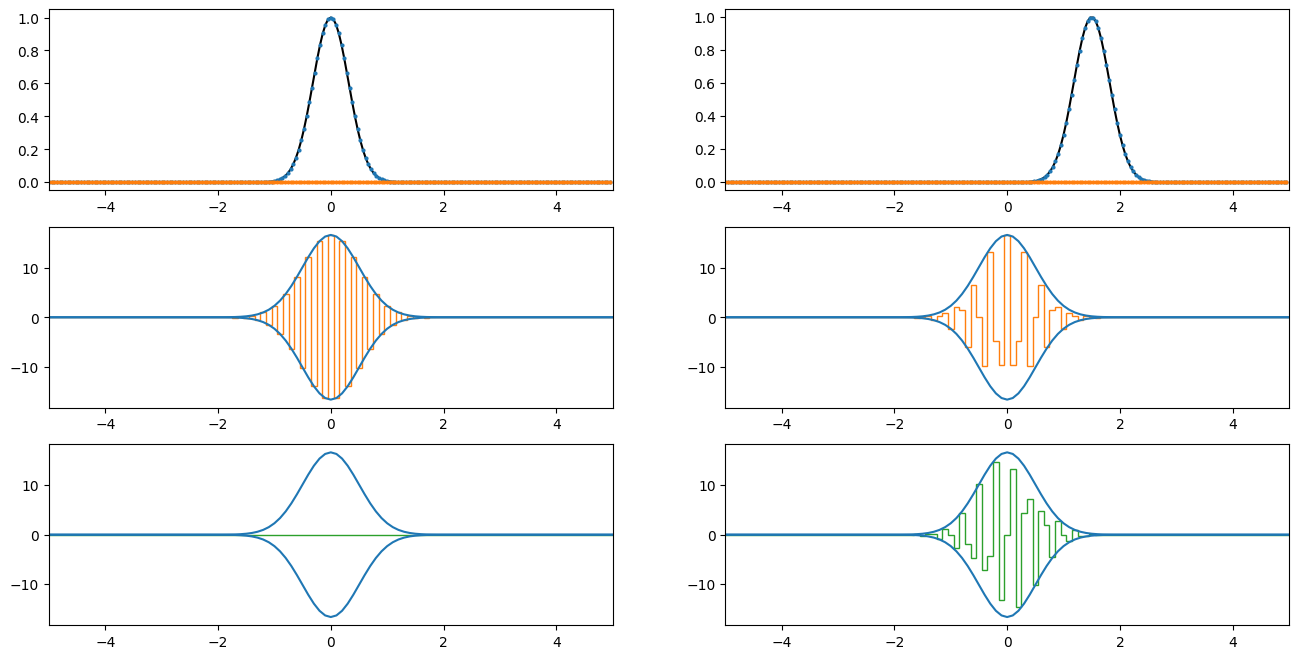

In [1]:
import numpy as np
from numpy import fft as ft
import matplotlib.pyplot as plt

N = 2*3*5*7
L = 10
xn = np.arange(N)*L/N-L/2
kn = np.arange(-N//2+1, N//2+1)/L
alpha = 5

fig,ax = plt.subplots(3, 2, figsize=(16,8))
for nsub, x0 in enumerate((0, 1.5)): 
    psi = np.exp(-alpha*(xn-x0)**2)
    psihat = ft.fft(psi)
    psi2 = ft.ifft(psihat)

    ax[0][nsub].plot(xn, psi, 'k-')
    ax[0][nsub].plot(xn, psi2.real, 'o', markersize=2)
    ax[0][nsub].plot(xn, psi2.imag, 'o', markersize=2)

    frqs2 = np.concatenate((kn-.5/L, [kn[-1]+.5/L]))
    ph2 = np.concatenate((psihat[N//2+1:], psihat[:N//2+1]))
    ax[1][nsub].stairs(ph2.real, frqs2, color='C1')
    ax[1][nsub].plot(kn, np.absolute(ph2), color='C0')
    ax[1][nsub].plot(kn, -np.absolute(ph2), color='C0')
    ax[2][nsub].stairs(ph2.imag, frqs2, color='C2')
    ax[2][nsub].plot(kn, np.absolute(ph2), color='C0')
    ax[2][nsub].plot(kn, -np.absolute(ph2), color='C0')
    ax[0][nsub].set_xlim(-5,5)
    ax[1][nsub].set_xlim(-5,5)
    ax[2][nsub].set_xlim(-5,5)

plt.show()

# Fonctions de Bessel

Calculer quelques fonctions propres de l'opérateur Laplacien radial en 2 dimensions avec condition au bord de Dirichlet sur le cercle de rayon $r_0=4$:

\begin{align*}
\Delta\psi(r,\theta) &=
\left(
    \frac{\partial^2}{\partial r^2}+\frac 1r\frac{\partial}{\partial r}+\frac{1}{r^2} \frac{\partial^2}{\partial \theta^2}
\right)\psi(r,\theta),\\
\psi(r_0, \theta)&=0 .
\end{align*}

Ces fonctions sont données par:
$$
\psi_{mn}(r, \theta)=J_m(\lambda_{mn}r/r_0)\cos(m\theta)
$$
où $J_m$ est la fonction de Bessel d'ordre $m$ et $\lambda_{mn}$ est le $n$-ième zéro de $J_m$. 

Ces fonctions sont définies dans [Scipy:special](https://docs.scipy.org/doc/scipy/reference/special.html#bessel-functions)

Choisir 3 valeurs de $m,n$ est dessiner $\psi_{mn}$ comme [contour plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html) en coordonnées [polaires](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_demo.html).

Prendre également une combinaison linéaire de plusieurs $\psi_{mn}$ (avec p. ex. des coefficients aléatoires) et dessiner les résultat.

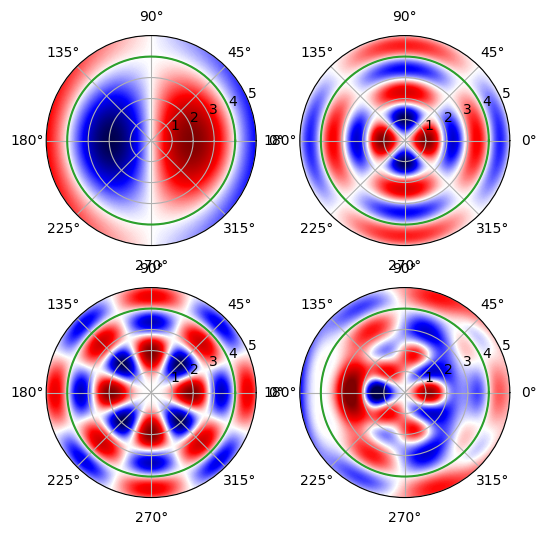

In [2]:
from scipy import special
from numpy import random as rnd

rads = np.linspace(0, 5, 200)
theta = np.linspace(0, 2*np.pi, 200)
rmesh, thmesh = np.meshgrid(rads, theta)
r0 = 4

z1 = special.jn_zeros(1, 1)[0]/r0
psi1 = special.jv(1, z1*rmesh)*np.cos(thmesh)
z2 = special.jn_zeros(2, 3)[2]/r0
psi2 = special.jv(2, z2*rmesh)*np.cos(2*thmesh)
z4 = special.jn_zeros(4, 2)[1]/r0
psi4 = special.jv(4, z4*rmesh)*np.cos(4*thmesh)

coefs = rnd.normal(0, 1, 6*5)
coefs /= (coefs**2).sum()
psi = np.zeros((rmesh*thmesh).shape)
for nj in range(1,6):
    for nz in range(1,5):
        jz = special.jn_zeros(nj, nz)[nz-1]/r0
        psi += coefs[nj*5+nz]*special.jv(nj, jz*rmesh)*np.cos(nj*thmesh)

fig, ax = plt.subplots(2, 2, subplot_kw={'projection': 'polar'}, figsize=(6,6))
ax[0][0].contourf(thmesh, rmesh, psi1, 500, cmap='seismic')
ax[0][0].plot(theta, r0*np.ones(200), color='C2')
ax[0][1].contourf(thmesh, rmesh, psi2, 500, cmap='seismic')
ax[0][1].plot(theta, r0*np.ones(200), color='C2')
ax[1][0].contourf(thmesh, rmesh, psi4, 500, cmap='seismic')
ax[1][0].plot(theta, r0*np.ones(200), color='C2')
ax[1][1].contourf(thmesh, rmesh, psi, 500, cmap='seismic', vmin=-.1, vmax=.1)
ax[1][1].plot(theta, r0*np.ones(200), color='C2')
plt.show()

Représenter les mêmes fonctions en 3D avec [Matplotlib:plot_surface](https://matplotlib.org/stable/gallery/mplot3d/subplot3d.html).

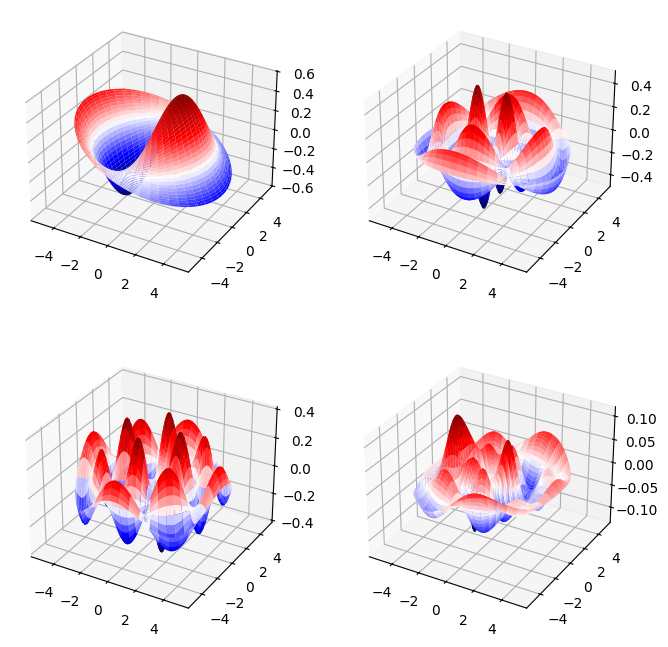

In [3]:
X, Y = rmesh*np.cos(thmesh), rmesh*np.sin(thmesh)

fig, ax = plt.subplots(2, 2, subplot_kw={'projection': '3d'}, figsize=(8,8))
ax[0][0].plot_surface(X, Y, psi1, cmap='seismic')
ax[0][1].plot_surface(X, Y, psi2, cmap='seismic')
ax[1][0].plot_surface(X, Y, psi4, cmap='seismic')
ax[1][1].plot_surface(X, Y, psi, cmap='seismic')
plt.show()